<a href="https://colab.research.google.com/github/pks98/Spam_classifier/blob/main/Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Date Cleaning

In [ ]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.rename(columns={"v1":"Target",'v2':'Text'},inplace=True)

In [ ]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df[df.duplicated()]

,Target,Text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop='first',inplace=True)

In [ ]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['Target']=enc.fit_transform(df['Target'])

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ham=0,spam=1

# EDA

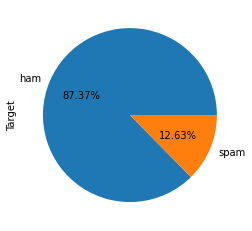

In [ ]:
df['Target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%.2f%%')

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['no_of_character']=df['Text'].apply(len)

In [ ]:
df.head()

,Target,Text,no_of_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5164    [This, is, the, 2nd, time, we, have, tried, 2,...
5165     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5166    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5167    [The, guy, did, some, bitching, but, I, acted,...
5168                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [ ]:
df['no_of_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,Text,no_of_character,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5164    [This is the 2nd time we have tried 2 contact ...
5165              [Will Ì_ b going to esplanade fr home?]
5166    [Pity, * was in mood for that., So...any other...
5167    [The guy did some bitching but I acted like i'...
5168                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [ ]:
df['no_of_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Text,no_of_character,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,Target,no_of_character,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [ ]:
# describe function on spam messages

df[df['Target']==1][['no_of_character', 'no_of_words', 'no_of_sentences']].describe()

,no_of_character,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [ ]:
# describe function on ham messages


df[df['Target']==0][['no_of_character', 'no_of_words', 'no_of_sentences']].describe()

,no_of_character,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

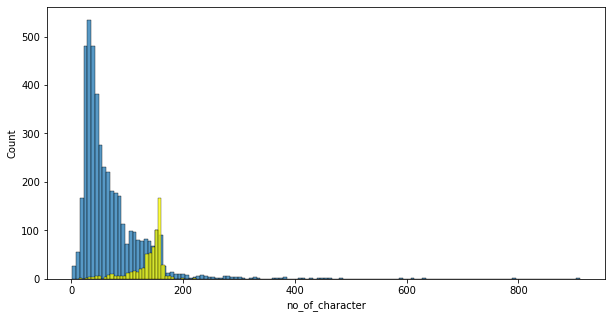

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['no_of_character'])
sns.histplot(df[df['Target']==1]['no_of_character'],color='yellow')

In [ ]:
df[df['Target']==0]['no_of_character']

0       111
1        29
3        49
4        61
6        77
       ... 
5162     12
5165     37
5166     57
5167    125
5168     26
Name: no_of_character, Length: 4516, dtype: int64

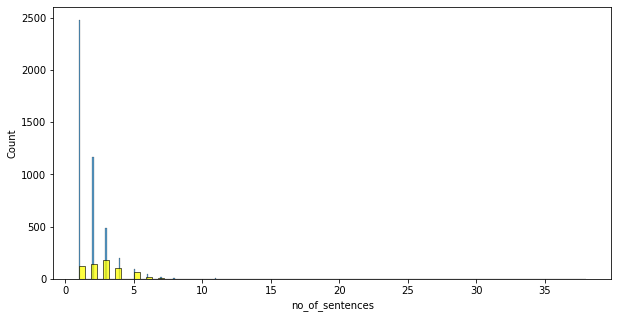

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['no_of_sentences'])
sns.histplot(df[df['Target']==1]['no_of_sentences'],color='yellow')

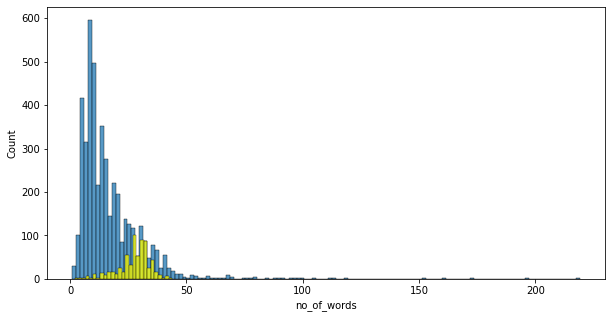

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['no_of_words'])
sns.histplot(df[df['Target']==1]['no_of_words'],color='yellow')

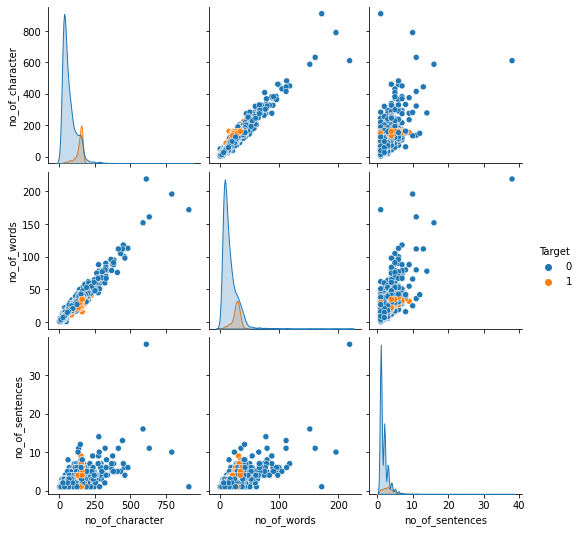

In [ ]:
sns.pairplot(df,hue='Target')

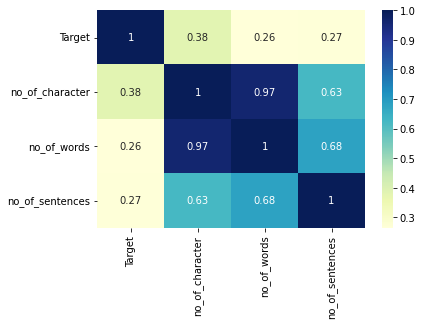

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')  

# Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [ ]:
def transform(text):
  text=text.lower()                      #Converting the text to lower case
  text=nltk.word_tokenize(text)          #Tokenizing the words
  
  temp=[]
  for i in text:                         #only alphanumeric words
    if i.isalnum():
      temp.append(i)
  
  text=temp[:]

  temp=[]                                #removing stop words and punctuation 
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      temp.append(i)

  text=temp[:]

  temp=[]
  for i in text:
    temp.append(stem.stem(i))

  return " ".join(temp)


# Function Splitting and understanding

In [ ]:
transform("Hi My Name is Prajwal")        #Converting the text to lower case

'hi my name is prajwal'

In [ ]:
transform("Hi My Name is Prajwal")        #Tokenizing the words

['hi', 'my', 'name', 'is', 'prajwal']

In [ ]:
transform("Hi My Name is Prajwal %%")    #%% symbol is removed as it is not alphanumeric character

['hi', 'my', 'name', 'is', 'prajwal']

In [ ]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
transform('Hi My Name is Prajwal,What is your name?')   #After removing stopwords and punctuation

['hi', 'name', 'prajwal', 'name']

In [ ]:
from nltk.stem.porter import PorterStemmer

stem=PorterStemmer()
print(stem.stem('Gymming'))
print(stem.stem('Gaming'))

gym
game


In [ ]:
transform("My name is Prajwal,I like Gymming")   #After transforming the sentence

'name prajwal like gym'

In [ ]:
df['Text'].apply(transform)

0       go jurong point avail bugi n great world la e ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5164    2nd time tri 2 contact u pound prize 2 claim e...
5165                                b go esplanad fr home
5166                                    piti mood suggest
5167    guy bitch act like interest buy someth els nex...
5168                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [ ]:
df['tranformed_text']=df['Text'].apply(transform)

In [ ]:
df.head()

,Target,Text,no_of_character,no_of_words,no_of_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# WordCloud

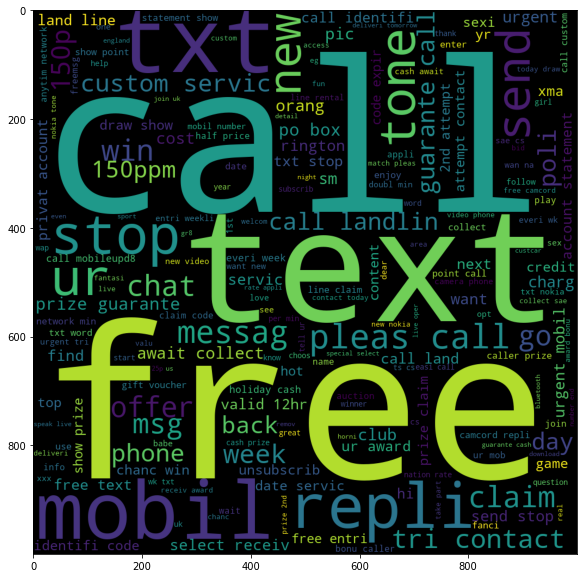

In [ ]:
from wordcloud import WordCloud

#WordCloud for spam

wc=WordCloud(width=1000,height=1000)
spam_wordcloud=wc.generate(df[df['Target']==1]['tranformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(spam_wordcloud)

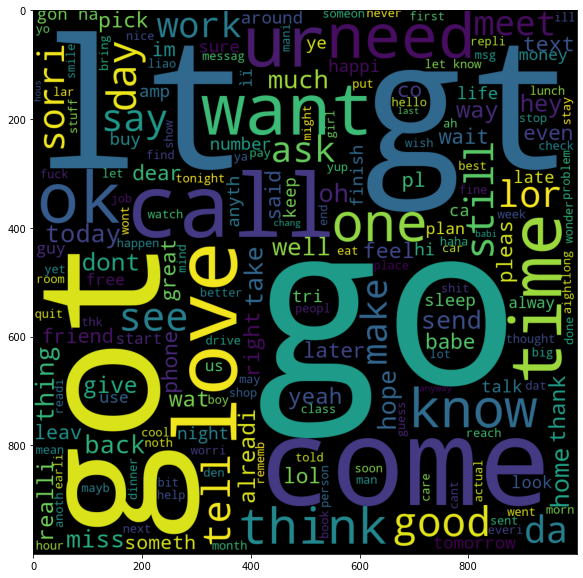

In [ ]:
#WordCloud for spam

wc=WordCloud(width=1000,height=1000)
ham_wordcloud=wc.generate(df[df['Target']==0]['tranformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(ham_wordcloud)

In [153]:
df.head()

,Target,Text,no_of_character,no_of_words,no_of_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Extracting top 50 words from spam and ham

In [159]:
spam_corpus=[]
for msg in df[df['Target']==1]['tranformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [161]:
len(spam_corpus)   #Total number of words in spam_corpus

9883

In [162]:
ham_corpus=[]
for msg in df[df['Target']==0]['tranformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)   #Total number of words in ham_corpus    

34771

In [170]:
from collections import Counter

spam_corpus_data=Counter(spam_corpus).most_common(50)
spam_corpus_df=pd.DataFrame(spam_corpus_data,columns=['word','frequency'])
spam_corpus_df.head()

,word,frequency
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


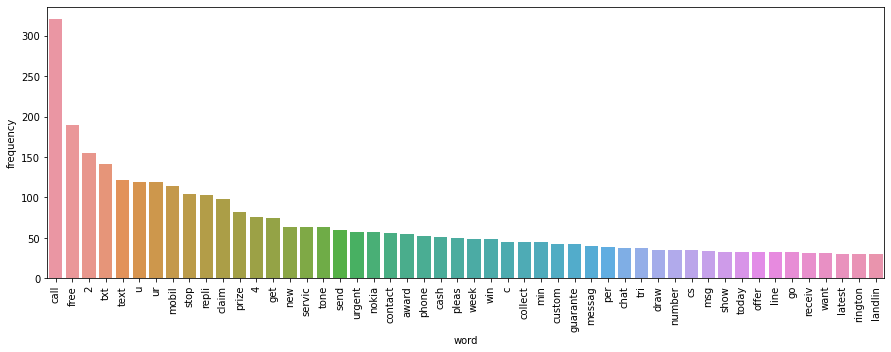

In [174]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(spam_corpus_df['word'],spam_corpus_df['frequency'])

In [175]:
ham_corpus_data=Counter(ham_corpus).most_common(50)
ham_corpus_df=pd.DataFrame(ham_corpus_data,columns=['word','frequency'])
ham_corpus_df.head()

,word,frequency
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


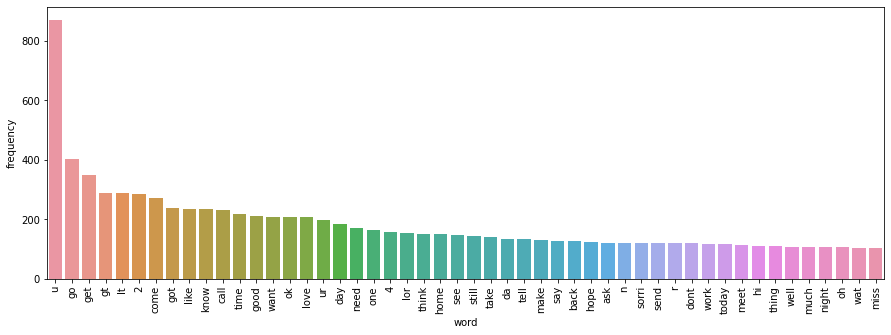

In [177]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(ham_corpus_df['word'],ham_corpus_df['frequency'])

# Model Building

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=3000)

In [180]:
x=tf.fit_transform(df['tranformed_text']).toarray()
y=df['Target'].values

In [183]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [184]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [186]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))

0.867504835589942
0.5022421524663677


In [187]:
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))

0.9729206963249516
1.0


In [188]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))

0.9816247582205029
0.9917355371900827


MultinomialNB gives the best precision_score

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [190]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [191]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [193]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [194]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(n_estimators=50, random_state=2))])

In [195]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [196]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
10,xgb,0.946809,0.946237
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
3,DT,0.933269,0.855670


# Dumping the model

In [198]:
import pickle

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))